<a href="https://colab.research.google.com/github/Shivachikkonda02/-Bank-Marketing-Analysis-and-Classification-ML-Project/blob/main/Bank%20Marketing%20Analysis%20%26%20Classification%20ML%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import necessary libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Read the dataset:

df=pd.read_csv("/content/bank.csv",sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [4]:
# Display the first few rows of the dataset
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
# Display the last few rows of the dataset

df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [6]:
#Get information about the dataset:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [7]:
# Get summary statistics of the dataset
print(df.describe())


               age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    25.000000  


In [8]:
# Check data types of columns
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [9]:
#Check for missing values:

df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

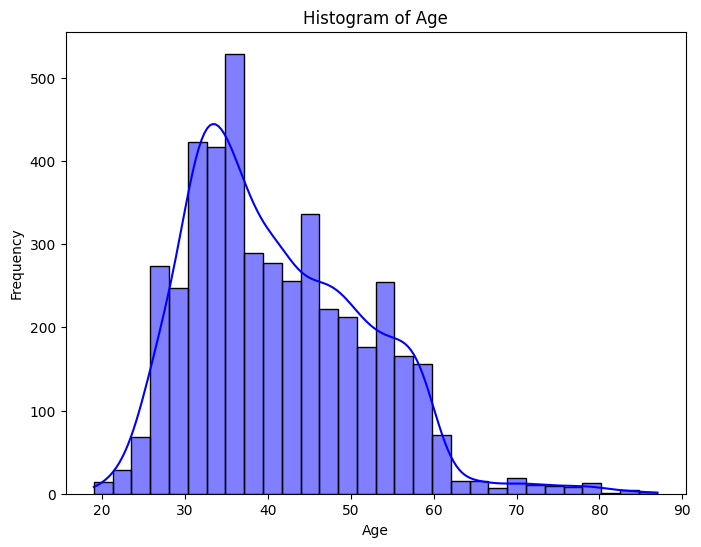

In [11]:
#This histogram displays the distribution of ages in the dataset, showing the frequency of each age group.

plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=30, kde=True, color='blue')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


<ipython-input-12-e744af4588f8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='job', data=df, palette='Set1')


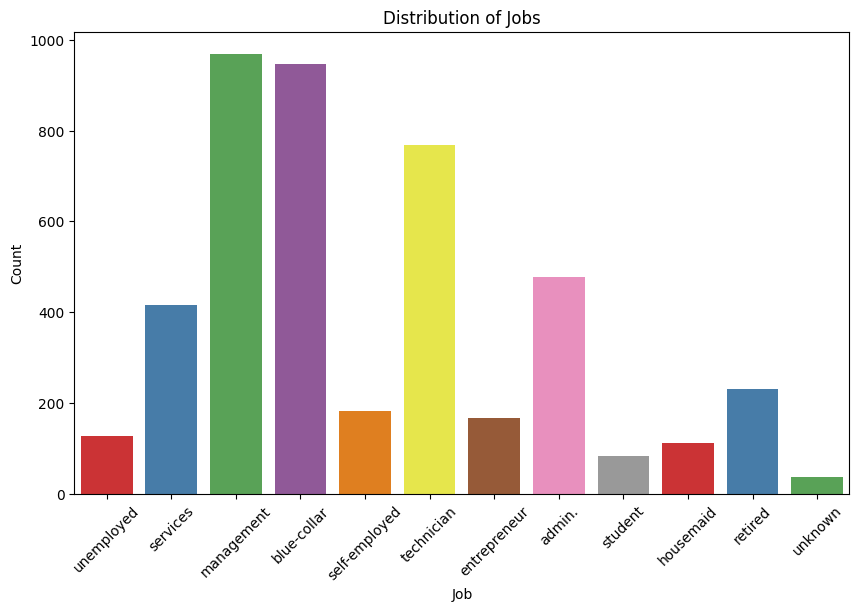

In [12]:
#This countplot displays the distribution of job categories with the count of individuals in each category.

plt.figure(figsize=(10, 6))
sns.countplot(x='job', data=df, palette='Set1')
plt.title('Distribution of Jobs')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


<ipython-input-13-e606d0af6931>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='marital', data=df, palette='Set2')


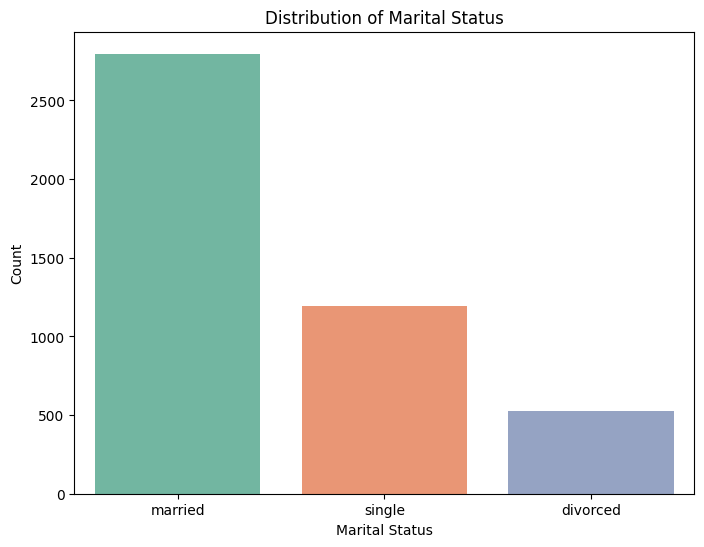

In [13]:
#This countplot visualizes the distribution of individuals across different marital statuses.

plt.figure(figsize=(8, 6))
sns.countplot(x='marital', data=df, palette='Set2')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()


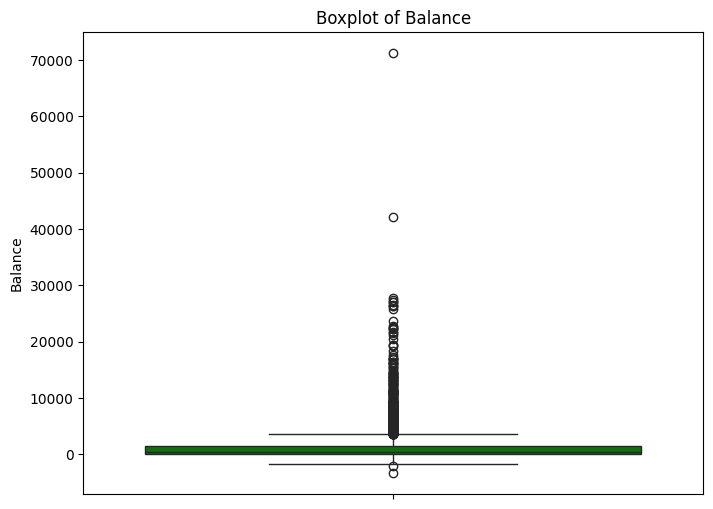

In [14]:
#This boxplot visualizes the distribution of balance values in the dataset, showing the median, quartiles, and potential outliers.

plt.figure(figsize=(8, 6))
sns.boxplot(df['balance'], color='green')
plt.title('Boxplot of Balance')
plt.ylabel('Balance')
plt.show()


<ipython-input-15-9bd9ceb7fdfe>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='education', data=df, palette='pastel')


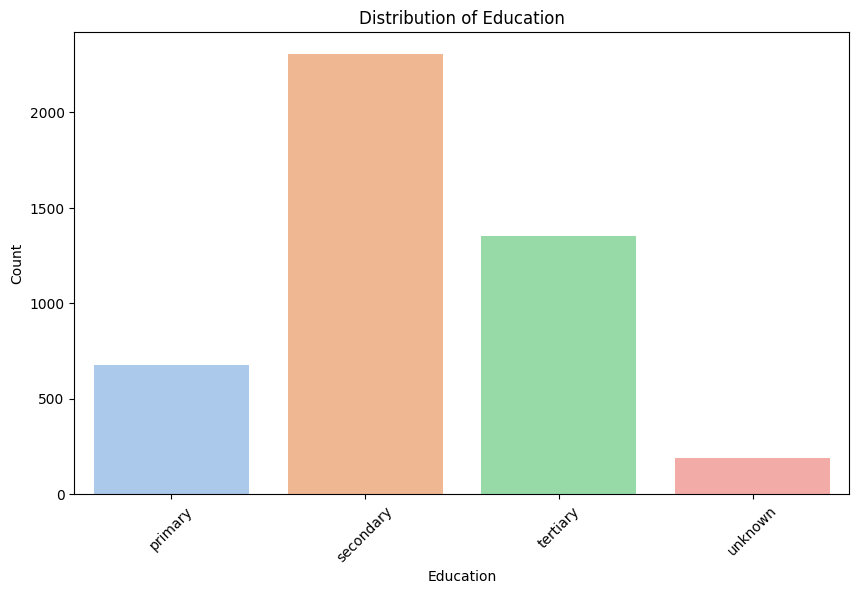

In [15]:
#This countplot represents the distribution of education levels among the individuals in the dataset, displaying the count of each education category.

plt.figure(figsize=(10, 6))
sns.countplot(x='education', data=df, palette='pastel')
plt.title('Distribution of Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [16]:
#This line of code calculates the frequency of each job category in the 'job' column of the DataFrame and displays the counts in descending order

df['job'].value_counts()

job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64

In [17]:
#This line of code calculates the frequency of each marital status category in the 'marital' column of the DataFrame and displays the counts in descending order.

df['marital'].value_counts()

marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64

In [18]:
#This line of code calculates the frequency of each education level category in the 'education' column of the DataFrame and displays the counts in descending order.

df['education'].value_counts()

education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64

In [19]:
#This line of code calculates the frequency of default categories in the 'default' column of the DataFrame and displays the counts.

df['default'].value_counts()

default
no     4445
yes      76
Name: count, dtype: int64

In [20]:
import sklearn

In [44]:
from sklearn.preprocessing import LabelEncoder

#  LabelEncoder converts categorical variables into numerical values.
label_encoder = LabelEncoder()

# Encode categorical columns
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Display the encoded dataframe
print(df.head())


   age  job  marital  education  default  balance  housing  loan  contact  \
0   30   10        1          0        0     1787        0     0        0   
1   33    7        1          1        0     4789        1     1        0   
2   35    4        2          2        0     1350        1     0        0   
3   30    4        1          2        0     1476        1     1        2   
4   59    1        1          1        0        0        1     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0   19     10        79         1     -1         0         3  0  
1   11      8       220         1    339         4         0  0  
2   16      0       185         1    330         1         0  0  
3    3      6       199         4     -1         0         3  0  
4    5      8       226         1     -1         0         3  0  


In [22]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3,0
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,-1,0,3,0
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,-1,0,3,0
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1,0


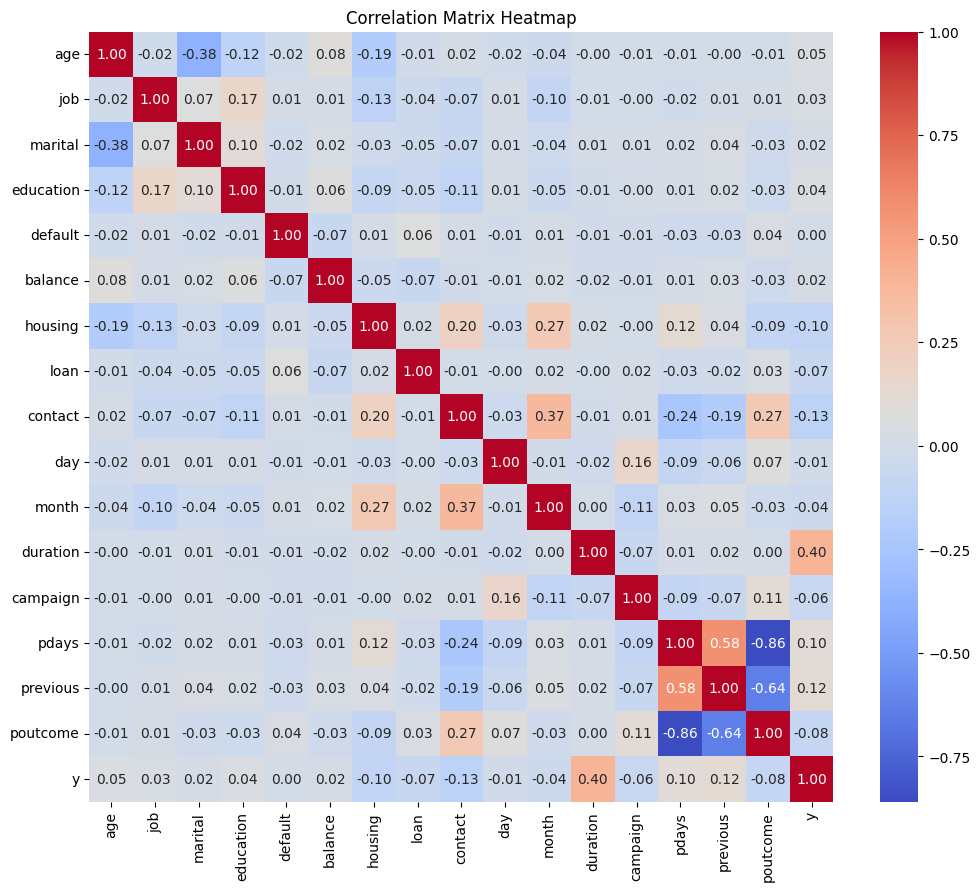

In [23]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f")

plt.title('Correlation Matrix Heatmap')
plt.show()

In [31]:
# This code calculates and displays the mean balance for each marital status, providing insights into the average account balance across different marital statuses.

grouped_data = df.groupby('marital')['balance'].mean()
print(grouped_data)

marital
0    1122.390152
1    1463.195567
2    1460.414716
Name: balance, dtype: float64


In [30]:
# This code calculates and displays the median balance for each education level, providing insight into the distribution of account balances across different educational backgrounds.

education_balance = df.groupby('education')['balance'].median()
print("Median balance for each education level:")
print(education_balance)

Median balance for each education level:
education
0    404.5
1    385.5
2    583.5
3    574.0
Name: balance, dtype: float64


In [29]:
# This code counts the number of clients based on their housing and loan status, providing information about the distribution of clients with different housing and loan statuses.
housing_loan_count = df.groupby(['housing', 'loan']).size()
print("\nNumber of clients based on housing and loan status:")
print(housing_loan_count)


Number of clients based on housing and loan status:
housing  loan
0        0       1677
         1        285
1        0       2153
         1        406
dtype: int64


In [32]:
#This code separates the feature columns (X) from the target column (y) in the dataset 'df'.
# Taking x and y values from the dataset.

x=df.drop('y',axis=1)
y=df['y']

In [33]:
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,-1,0,3
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,-1,0,3
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1


In [34]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: y, Length: 4521, dtype: int64

In [35]:
y.value_counts()

y
0    4000
1     521
Name: count, dtype: int64

In [36]:
#Split the dataset into training and testing sets:

from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [38]:
x_train.shape

(3616, 16)

In [39]:
x_test.shape

(905, 16)

Random Forest Classifier is chosen due to its ability to handle both classification and regression tasks, maintain accuracy with large datasets, and mitigate overfitting by aggregating multiple decision trees, resulting in robust predictions.


In [40]:
#Initialize and train a Random Forest classifier model:

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)


In [41]:
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [45]:
#Make predictions using the trained model:
#This line of code generates predictions using the trained model on the test dataset.

predictions = model.predict(x_test)


In [43]:
#Evaluate the model using accuracy, classification report, and confusion matrix:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, predictions))

print("Classification_report:")
print(classification_report(y_test, predictions))

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))


Accuracy: 0.901657458563536
Classification_report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       807
           1       0.60      0.27      0.37        98

    accuracy                           0.90       905
   macro avg       0.76      0.62      0.66       905
weighted avg       0.88      0.90      0.88       905

Confusion Matrix:
[[790  17]
 [ 72  26]]
